<p style="background-color:#F06292;font-family:newtimeroman;color:#FFF;font-size:180%;text-align:center;border-radius:10px 10px;">SIMPLE LINEAR REGRESSION 📈 </p>
Simple linear regression is a method to predict dependent variable(Y) based on values of independent variables(X). It is assumed that the two variables are lenearly related. Hence, we try to find a linear function that predicts the response value(Y) as accurately as possible as a function of the feature or independent variable(X).

<center><img src = "https://miro.medium.com/max/960/1*jt-pyQQ7bgL2lyganse0nQ.png"></center>

To establish notation for future use, we’ll use x(i) to denote the “input” variables (living area in this example), also called input features, and y(i) to denote the “output” or target variable that we are trying to predict (price). A pair (x(i), y(i)) is called a training example, and the dataset that we’ll be using to learn—a list of m training examples (x(i),y(i)); i=1,...,m—is called a training set. Note that the superscript “(i)” in the notation is simply an index into the training set, and has nothing to do with exponentiation. We will also use X to denote the space of input values, and Y to denote the space of output values. In this example, X = Y = ℝ.

To describe the supervised learning problem slightly more formally, our goal is, given a training set, to learn a function h : X → Y so that h(x) is a “good” predictor for the corresponding value of y. For historical reasons, this function h is called a hypothesis.

<h1><center><font size="5">$ salePrice = a1 * GrLivArea + a0 $ </font></center></h1>

<center><img src = "https://miro.medium.com/max/1400/0*QG8dIxNTaBH7Qrxq"></center>

<p style="background-color:#F06292;font-family:newtimeroman;color:#FFF;font-size:180%;text-align:center;border-radius:10px 10px;"> HOUSE PRICE PREDICTION 🏡 </p>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error,r2_score

In [2]:
data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

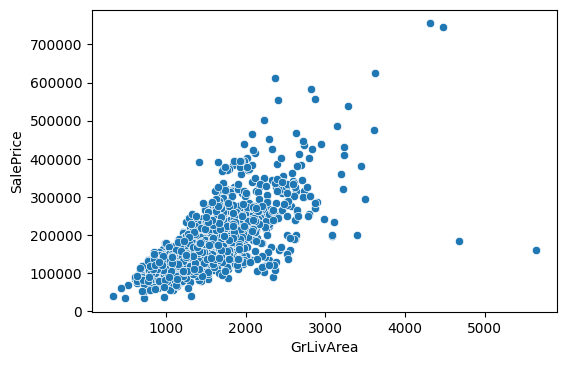

In [4]:
plt.figure(dpi=100)
sns.scatterplot(x="GrLivArea", y="SalePrice", data=data);

In [5]:
def loss_function(y_true, y_pred):
    N = y_pred.shape[0]
    return np.sum((y_pred - y_true)**2)/N 

# a0 gradient
def grad0(y_true, y_pred):
    N = y_pred.shape[0]
    return 2 * np.sum(y_pred - y_true)/N

# a1 gradient
def grad1(y_true, y_pred, x_train):
    N = y_pred.shape[0]
    return 2 * np.sum((y_pred - y_true) * x_train)/N

# Parameter update
def updateParams(param, lr, delta):
    return param - lr * delta

# Forward function
def forward(params, pX):
    return params[0] + params[1] * pX

# Normalizer
def scaler(x):
    return (x - np.mean(x)) / np.std(x)



a0: 2.0960524031816063e-16
a1: 0.6956974485680824
----------


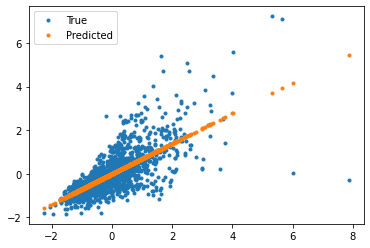

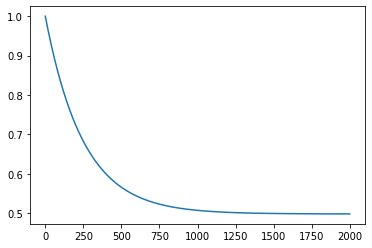

In [6]:
a0 = 0
a1 = 0

# X, Y
x = scaler(data["GrLivArea"].values)
y = scaler(data["SalePrice"].values)

# Learning rate
lr = 1e-3

# Errors
errors = []

epochs = 2000
for i in range(epochs):
    
    # Forward function
    y_pred = forward(params=[a0, a1], pX=x)
    
    # Calculate loss
    loss = loss_function(y_true=y, y_pred=y_pred)
    errors.append(loss)
    
    # Calculate gradients
    gr0 = grad0(y_true=y, y_pred=y_pred)
    gr1 = grad1(y_true=y, y_pred=y_pred, x_train=x)
    
    # Update parameters
    a0 = updateParams(a0, lr=lr, delta=gr0)
    a1 = updateParams(a1, lr=lr, delta=gr1)
    
print("a0: {}".format(a0))
print("a1: {}".format(a1))
print("----------")
    
plt.plot(x, y, ".", label="True")
plt.plot(x, y_pred, ".", label="Predicted")
plt.legend();

plt.figure()
plt.plot(errors);

In [7]:
print("R^2 : ", r2_score(y, y_pred))
print("MSE :", mean_squared_error(y,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y, y_pred)))

R^2 :  0.5019808717489074
MSE : 0.49801912825109246
RMSE: 0.7057047032938724
